- 1. 데이터 확인
- 2. 메타 데이터 정의
- 3. 기술 통계
- 4. 불균형 클래스 다루기
- 5. 데이터의 품질 검사
- 6. 탐색 데이터 시각화
- 7. 피처 엔지니어링
- 8. 피처 선택
- 9. 피처 스케일링

목적 : 어떤 차주가 내년에 보험 청구를 할 확률을 예측하는 것
    - target = 1 : 보험 청구를 한다
    - target = 0 : 보험 청구를 하지 않는다

# 1. 데이터 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)

- 유사한 피처들은 같은 태그를 가지고 있다.(예: ind, reg, car, calc)
- 피처 이름 뒤에 bin은 binary 피처를 의미하고, cat은 category 피처를 의미
- 피처 이름에 아무런 접미사가 없는 것은 연속되는 수이거나 서수이다.
- 값이 -1이면 관찰에서 누락된 것을 의미
- target column : 해당 보험 계약자에 대한 청구가 제기되었는지의 여부

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


- 이진 변수
- 범주 값이 정수인 범주형 변수
- 정수 또는 실수 변수
- 값이 -1인 누락된 변수
- 타겟 변수와 ID 변수

In [4]:
train.shape

(595212, 59)

In [5]:
# 중복 행 제거하고 shape 확인
train.drop_duplicates()
train.shape

(595212, 59)

> 중복된 행 없다.

In [6]:
test.shape

(892816, 58)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

# 2. 메타데이터

데이터 관리를 쉽게 하기 위해 변수에 대한 메타 정보를 데이터프레임에 저장한다.
(분석, 시각화, 모델링을 위해 특정 변수를 선택하고자 할 때 도움이 됨)

- role: input, ID, target
- level: binary(이진형), nominal(명목형), interval(연속형), oridnal(순서형)
- keep: True or False (데이터를 활용할 것이냐 아니냐에 따라)
- dtype: int, float, str

In [8]:
train.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [9]:
# m
if 'bin' in 'ps_ind_08_bin':
    print("True")
else:
    print("False")

True


In [10]:
data = []
for f in train.columns:
    # role 정의
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
         
    # level 정의
    if 'bin' in f or f == 'target':  # if ('bin' in f) or (f == 'target'):
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    else:                             #train[f].dtype == int:
        level = 'ordinal'
        
    # id를 제외한 모든 변수를 True로 초기화
    keep = True
    if f == 'id':
        keep = False
    
    # 데이터 유형 정의
    dtype = train[f].dtype
    
    # 변수에 대한 메타 데이터를 담는 사전 만들기
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


nominal 변수를 추출

In [11]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [12]:
# ordinal 변수를 추출
meta[(meta.level == 'ordinal') & (meta.keep)].index

Index(['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11',
       'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08',
       'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13',
       'ps_calc_14'],
      dtype='object', name='varname')

role 및 level 당 변수의 개수를 출력 (role 기준으로)

In [13]:
# size() = count()
# reset_index() : 안 쓰면 컬럼 이름이 일자로 정렬 X
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


# 3.기술 통계(Descriptive statistics)

범주형 변수와 id 변수에서 평균, 표준 등을 계산하는 것은 별로 의미가 없으므로, 나머지 변수들만 확인한다.

## 1) Interval 변수(실수형)

In [14]:
interval_id = meta[(meta.level == 'interval') & (meta.keep)].index
train[interval_id].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


- reg 변수
  - ps_reg_03 : 누락 값 존재
  - 변수들 마다 범위(최소-최대)는 다릅니다. 스케일링을 할 수 있지만 우리가 사용하려는 분류기마다 다를 것 입니다.

- car 변수
  - ps_car_12, ps_car_14 : 누락 값 존재
  - 변수들 마다 범위가 다르고 스케일링 할 수 있다.

- calc 변수
  - 누락값 없다
  - 최대가 0.9인 어떤 비율일 것이다.
  - 3개의 calc 변수는 모두 유사한 분포를 가지고 있다

## 2) Ordinal 변수

In [15]:
Ordinal_id = meta[(meta.level == "ordinal") & (meta.keep)].index
train[Ordinal_id].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


> - ps_car_11만 유일하게 누락값이 존재
- 다양한 범위를 다루기 위해 스케일링을 적용 할 수 있다

## 3) Binary 변수

In [16]:
Binary_id = meta[(meta.level == "binary") & (meta.keep)].index
train[Binary_id].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> - 평균 => 대부분의 경우 값이 0
- target의 평균 : 3.645% => 매우 불균형

# 4. 불균형 클래스 다루기

target = 1 인 행의 비율은 target = 0보다 훨씬 적다.
- target=1 행을 오버샘플링 (소수 클래스 데이터를 증가시킴)
- target=0 행을 언더샘플링 (다수 클래스 데이터에서 일부만 사용)

이 두 가지 방법으로 해결할 수 있다.

target=0 행을 언더샘플링

In [17]:
# 샘플링 전
print(train.shape)
train["target"].value_counts()

(595212, 59)


0    573518
1     21694
Name: target, dtype: int64

In [18]:
desired_apriori = 0.10

# target 값에 따라 인덱스 추출
idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

# target 값에 따른 행의 개수 추출
nb_0 = len(train.loc[idx_0]) # target = 0인 행이 몇 개 있는지
nb_1 = len(train.loc[idx_1]) # target = 1인 행이 몇 개 있는지
# print(nb_0)
# print(nb_1)

# 언더샘플링 비율과 target이 0인 레코드 수를 계산한다.
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

# target이 0인 행을 무작위로 선택하여  언더샘플된 인덱스를 구한다.
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)
print(undersampled_idx)

# target이 1인 인덱스와 언더샘플된 인덱스를 합쳐 구성합니다.
idx_list = list(undersampled_idx) + list(idx_1)
#print(idx_list)

# 언더샘플링 데이터프레임을 반환합니다.
train = train.loc[idx_list].reset_index(drop=True)

Rate to undersample records with target=0: 0.34043569687437886
Number of records with target=0 after undersampling: 195246
Int64Index([141652, 338484, 579616, 333839, 174512,  20344,  58123,  27384,
            575538,  51548,
            ...
            538107,  25459, 255379, 369043, 215496, 449967, 145188, 484849,
            192795, 385495],
           dtype='int64', length=195246)


In [19]:
# 샘플링 후
print(train.shape)
train["target"].value_counts()

(216940, 59)


0    195246
1     21694
Name: target, dtype: int64

# 5. 데이터의 품질 검사

## 1) Checking missing values*
missing values : -1

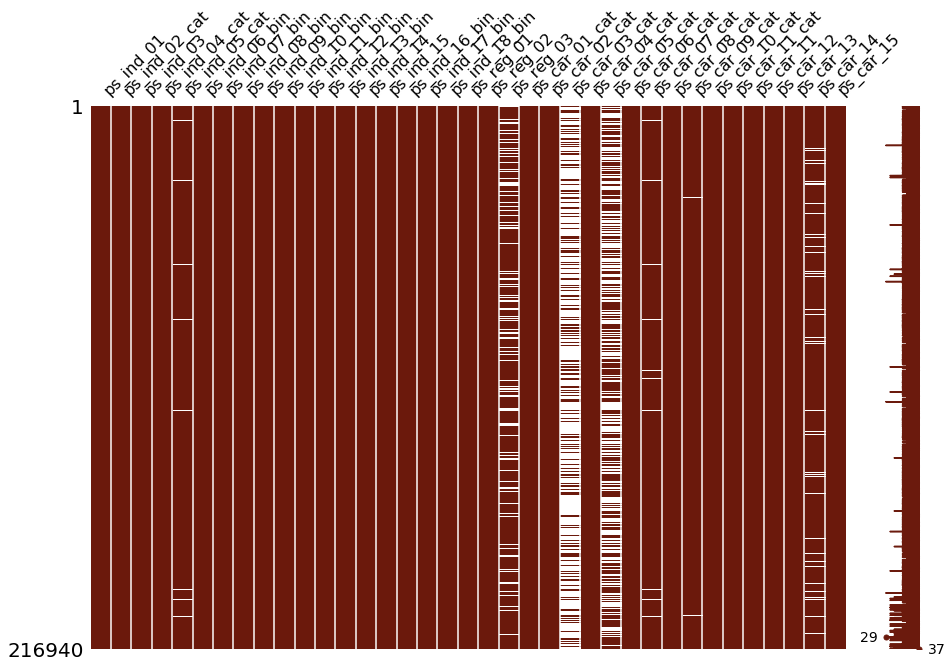

In [20]:
# 결측치 시각화
import missingno as msno

train_copy = train
train_copy = train_copy.replace(-1, np.NaN) # Null 값이 -1이라고 했으므로 이를 np.NaN으로 바꿈로

msno.matrix(df=train_copy.iloc[:, 2:39], figsize=(15,10), color=(0.42, 0.1, 0.05))

In [21]:
vars_with_missing = []

for f in train.columns:
    # 결측 값이 있는 열에 결측값이 몇 개 있는지
    missings = train[train[f] == -1][f].count()  ### ==>밑에
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings / train.shape[0]
    
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))    

Variable ps_ind_02_cat has 103 records (0.05%) with missing values
Variable ps_ind_04_cat has 51 records (0.02%) with missing values
Variable ps_ind_05_cat has 2256 records (1.04%) with missing values
Variable ps_reg_03 has 38580 records (17.78%) with missing values
Variable ps_car_01_cat has 62 records (0.03%) with missing values
Variable ps_car_02_cat has 2 records (0.00%) with missing values
Variable ps_car_03_cat has 148367 records (68.39%) with missing values
Variable ps_car_05_cat has 96026 records (44.26%) with missing values
Variable ps_car_07_cat has 4431 records (2.04%) with missing values
Variable ps_car_09_cat has 230 records (0.11%) with missing values
Variable ps_car_11 has 1 records (0.00%) with missing values
Variable ps_car_14 has 15726 records (7.25%) with missing values
In total, there are 12 variables with missing values


In [22]:
# m
train['ps_reg_03'] == -1

0         False
1         False
2         False
3         False
4         False
          ...  
216935    False
216936     True
216937    False
216938    False
216939    False
Name: ps_reg_03, Length: 216940, dtype: bool

In [23]:
# m
train[train['ps_reg_03'] == -1].head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
18,1254786,0,7,1,9,0,0,0,1,0,0,0,0,0,0,0,12,1,0,0,0.2,0.2,-1.0,0,1,-1,9,1,13,1,0,0,1,104,2,0.565685,2.108264,0.530094,3.741657,0.7,0.6,0.4,2,2,9,3,11,1,12,2,1,2,10,0,1,0,0,0,0
24,1425558,0,1,2,0,1,4,0,0,0,1,0,0,0,0,0,8,1,0,0,0.1,0.3,-1.0,8,1,-1,0,1,14,1,1,0,1,104,1,0.316070,0.508502,0.355668,1.732051,0.0,0.4,0.1,1,2,9,2,12,3,6,2,1,4,10,0,0,0,0,0,0
25,860206,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.4,0.1,-1.0,7,1,-1,0,-1,1,1,1,2,1,64,1,0.316228,0.656405,0.361939,3.316625,0.4,0.8,0.3,3,1,6,3,7,2,7,6,0,3,7,1,0,1,0,1,0
29,1265316,0,4,2,4,1,0,0,0,1,0,0,0,0,0,0,6,0,0,1,0.1,0.3,-1.0,4,1,-1,0,1,1,1,1,0,1,65,1,0.316228,0.545795,0.350714,2.449490,0.6,0.6,0.5,1,1,7,1,12,6,6,6,2,4,10,0,1,1,1,0,0
38,267652,0,2,1,1,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.3,0.3,-1.0,7,0,-1,0,-1,10,1,1,2,1,55,2,0.424264,1.116425,0.416533,3.605551,0.2,0.1,0.9,2,0,8,4,12,3,9,7,0,2,6,0,1,0,1,1,0


In [24]:
# m
train[train['ps_reg_03'] == -1]['ps_reg_03']

18       -1.0
24       -1.0
25       -1.0
29       -1.0
38       -1.0
         ... 
216918   -1.0
216924   -1.0
216932   -1.0
216934   -1.0
216936   -1.0
Name: ps_reg_03, Length: 38580, dtype: float64

> - ps_car_03_cat, ps_car_05_cat: 누락 값의 비율이 너무 높다. => 제거
- 누락 된 값이있는 다른 범주형 변수의 경우 누락 값 -1을 그대로 둘 수 있다.
- ps_reg_03 (continuous): 모든 레코드의 18 %가 누락 값이다. => 평균값으로 바꾸기
- ps_car_11 (ordinal): 누락 된 값이있는 레코드가 5 개뿐이다. => 모드로 교체
- ps_car_12 (continuous) : 누락 된 값이있는 레코드가 1 개뿐이다. => 평균값으로 바꾸기??????????????????????????????????????????????????????/
- ps_car_14 (continuous) : 모든 레코드의 7 %가 누락 값이다. => 평균값으로 바꾸기

In [25]:
# 누락 된 값이 너무 많은 변수는 제거
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat'] 
train.drop(vars_to_drop, inplace=True, axis=1)
meta.loc[(vars_to_drop),'keep'] = False  # 메타 데이터 갱신( train에서는 제거 했지만  meta의 'keep'열에는  False값으로 채움)


# 평균 또는 모드로 대체하기
mean_imp = Imputer(missing_values=-1, strategy='mean', axis=0)
mode_imp = Imputer(missing_values=-1, strategy='most_frequent', axis=0)
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

C:\Users\lsl\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\lsl\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


## 2) 범주형 변수의 카디널리티 확인하기*

카디널리티(cardinality) : 전체 행에 대한 특정 컬럼의 중복 수치를 나타내는 지표

- 중복도가 ‘낮으면’ 카디널리티가 ‘높다’고 표현
- 중복도가 ‘높으면’ 카디널리티가 ‘낮다’고 표현

In [26]:
# 범주형 변수가 각각 몇개의 범주로 되어있는지 확인

v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    #print(train[f].value_counts())
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


> ps_car_11_cat만 많은 다른 값을 가지고 있다.

In [27]:
# Script by https://www.kaggle.com/ogrellier
# Code: https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing은 Daniele Micci-Barreca의 논문에서와 같이 계산됩니다.
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : pd.Series 형태의 학습할 범주형 피처
    tst_series : pd.Series 형태의 테스트할 범주형 피처
    target : pd.Series 형태의 타겟 데이터
    min_samples_leaf (int) : 범주의 평균을 고려할 최소 샘플
    smoothing (int) : 범주 평균과 이전의 균형을 맞추기 위한 스무딩 효과 
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    
    # 타겟 평균을 계산
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    
    # 스무딩 계산
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    
    # 모든 타겟 데이터에 평균 적용하기
    prior = target.mean()
    
    # 카운트가 클수록 full_avg가 적어집니다.
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    
    # 학습, 테스트 데이터에 평균 적용
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    
    # pd.merge는 인덱스를 유지하지 않으므로 복원합니다.
    ft_trn_series.index = trn_series.index 
    
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    
    # pd.merge는 인덱스를 유지하지 않으므로 복원합니다.
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [28]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"], 
                             test["ps_car_11_cat"], 
                             target=train.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)
    
train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)

meta.loc['ps_car_11_cat','keep'] = False  # Updating the meta

test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

In [29]:
train_encoded

0         0.095601
1         0.122013
2         0.095508
3         0.086422
4         0.108855
            ...   
216935    0.120323
216936    0.113790
216937    0.119815
216938    0.119506
216939    0.067096
Name: ps_car_11_cat_mean, Length: 216940, dtype: float64

In [30]:
train['ps_car_11_cat_te'].value_counts().shape[0]

216940

# 6. 탐색 데이터 시각화

## 1) Categorical variables

<Figure size 432x288 with 0 Axes>

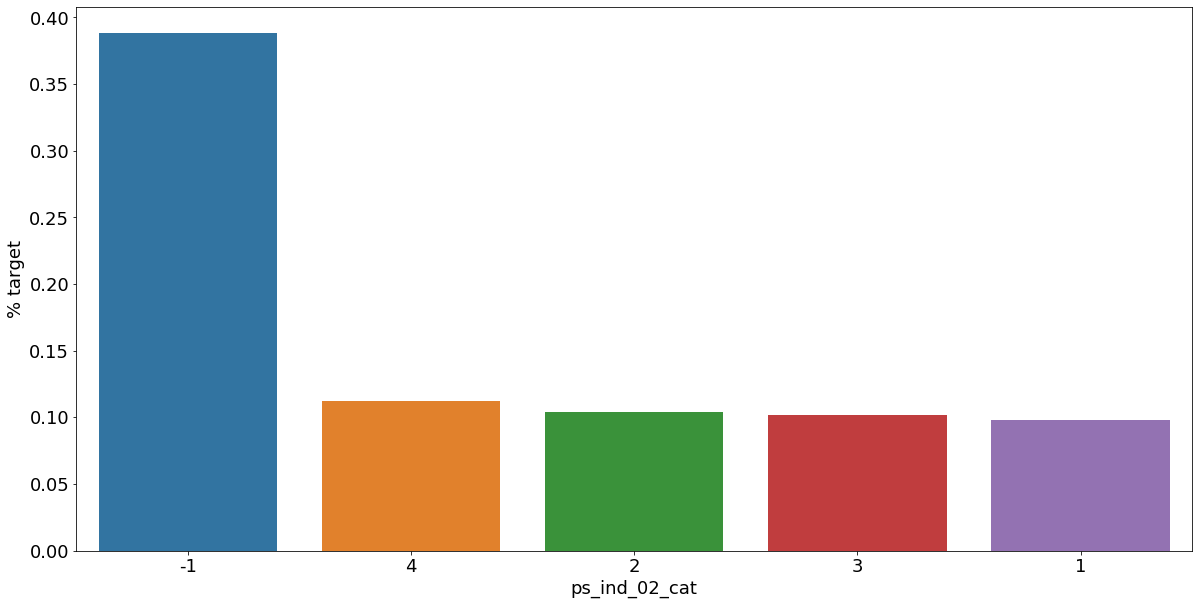

<Figure size 432x288 with 0 Axes>

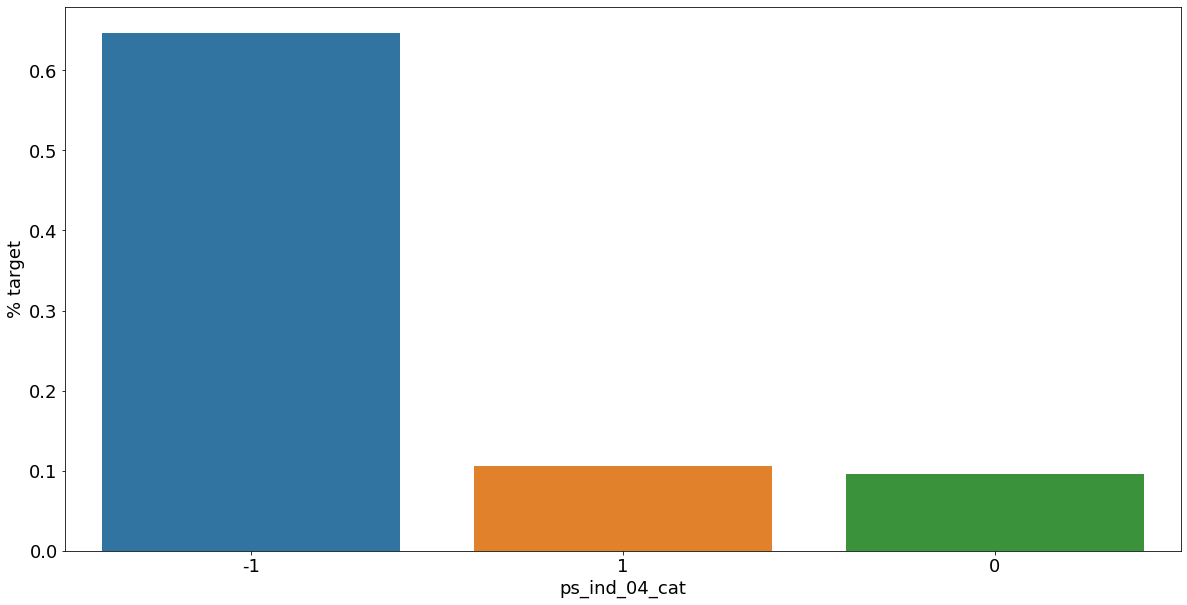

<Figure size 432x288 with 0 Axes>

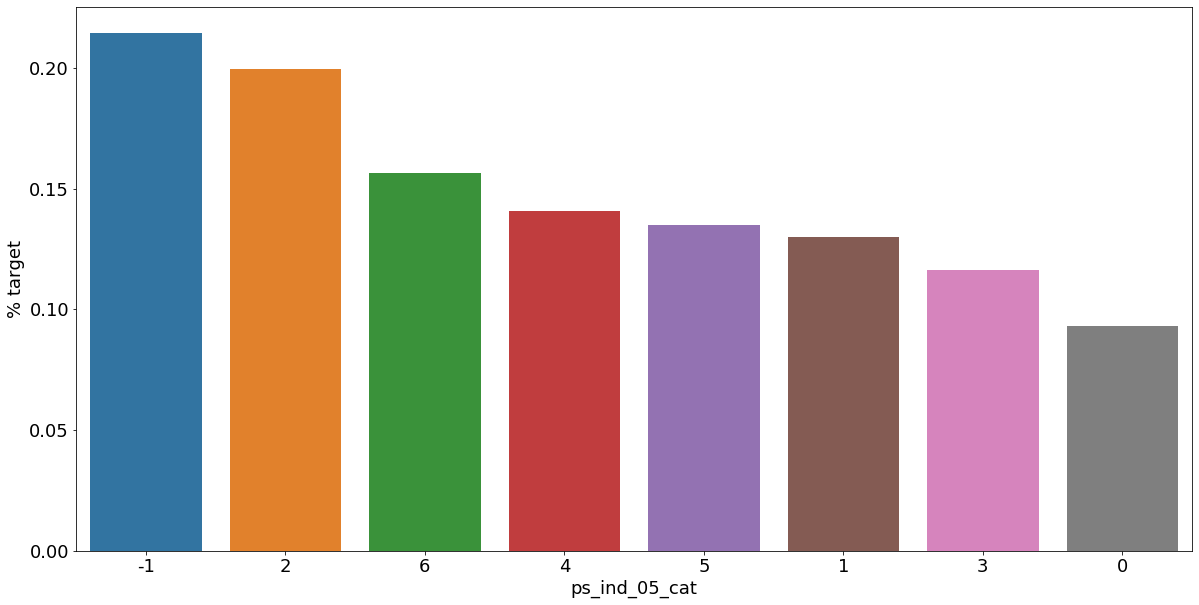

<Figure size 432x288 with 0 Axes>

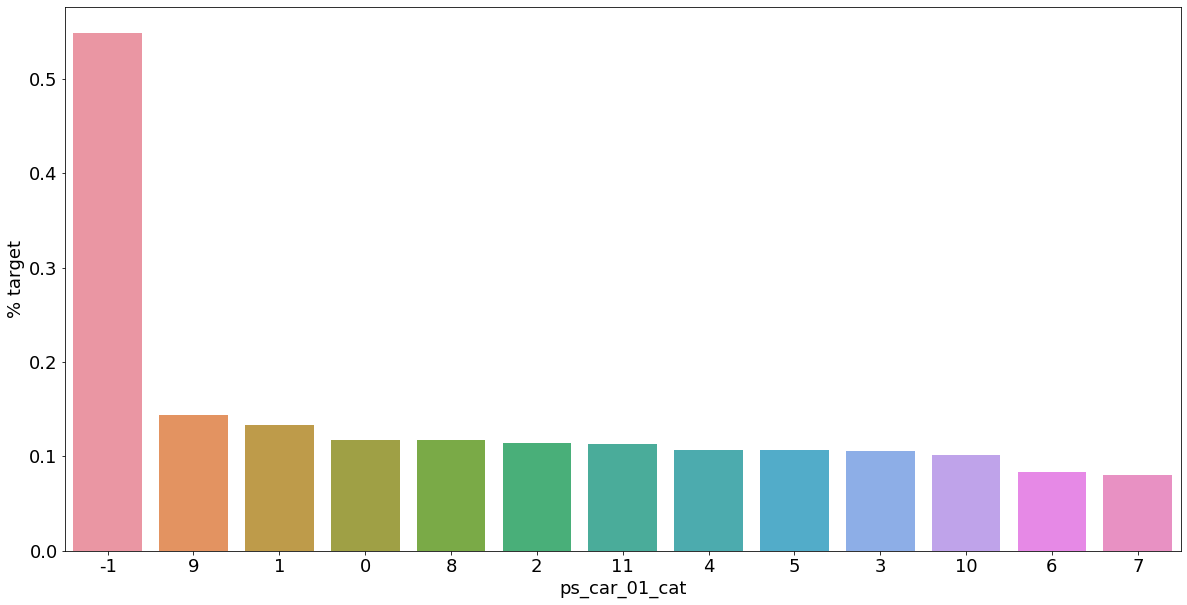

<Figure size 432x288 with 0 Axes>

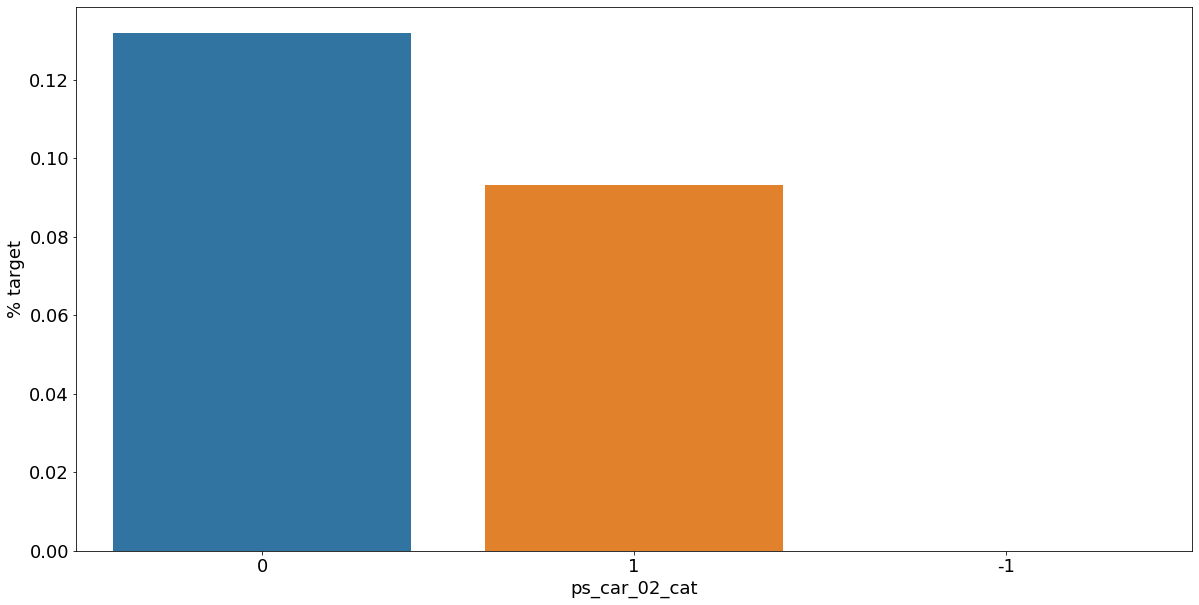

<Figure size 432x288 with 0 Axes>

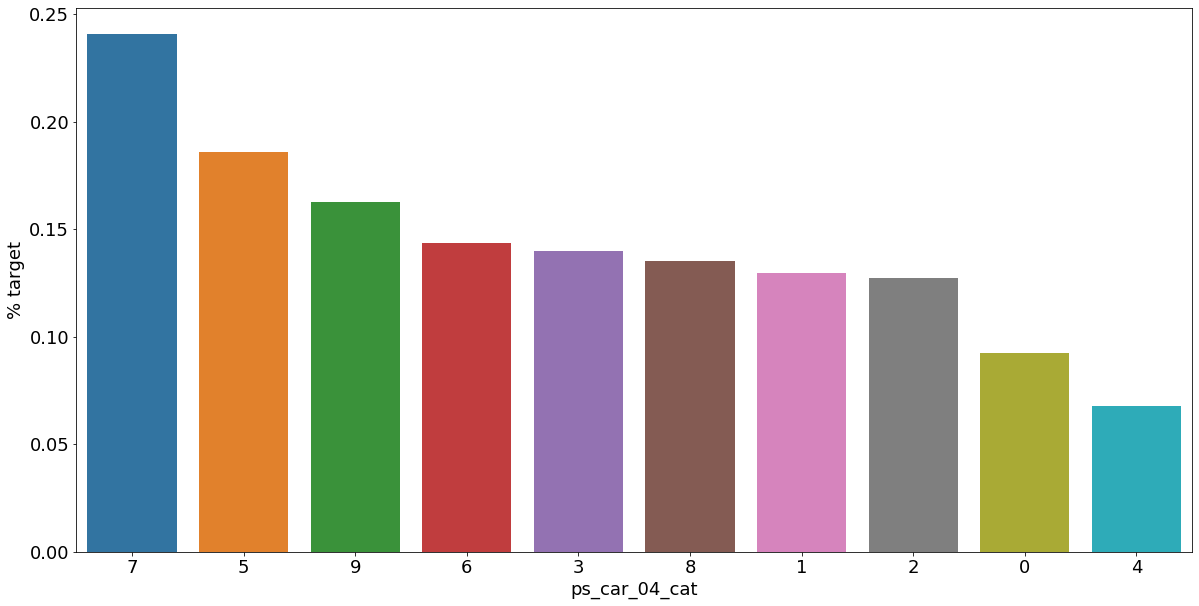

<Figure size 432x288 with 0 Axes>

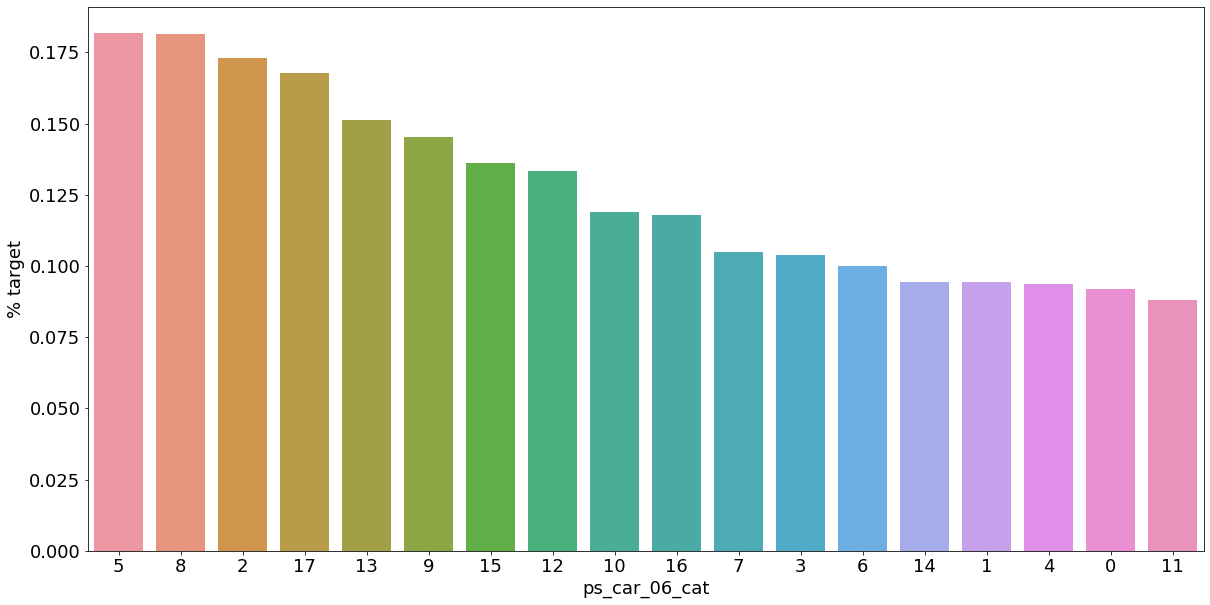

<Figure size 432x288 with 0 Axes>

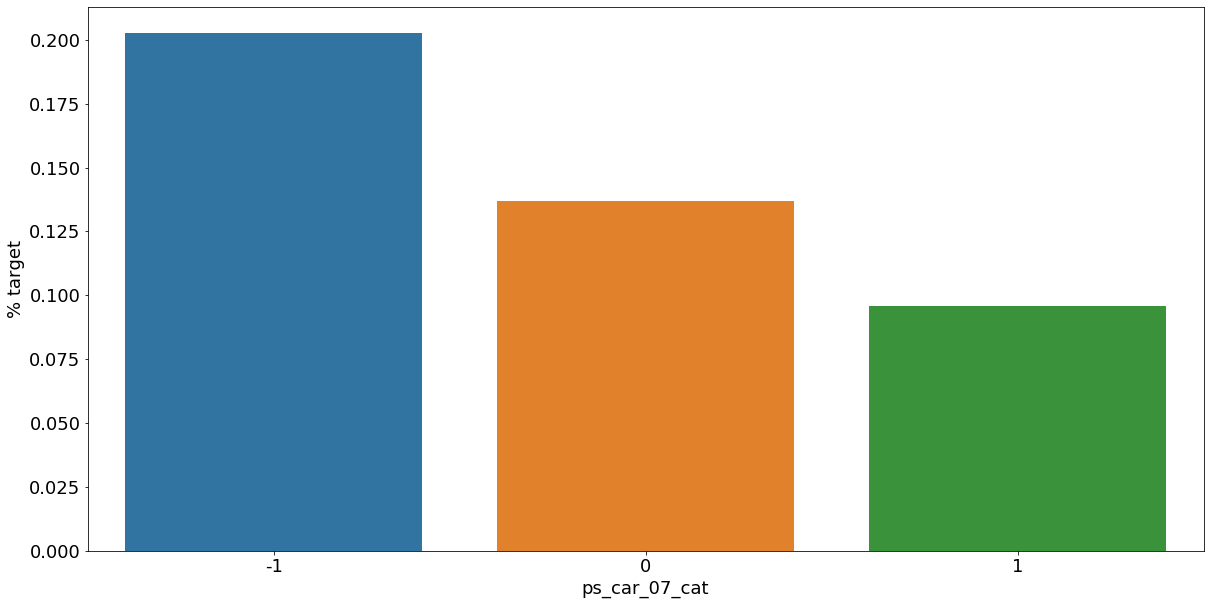

<Figure size 432x288 with 0 Axes>

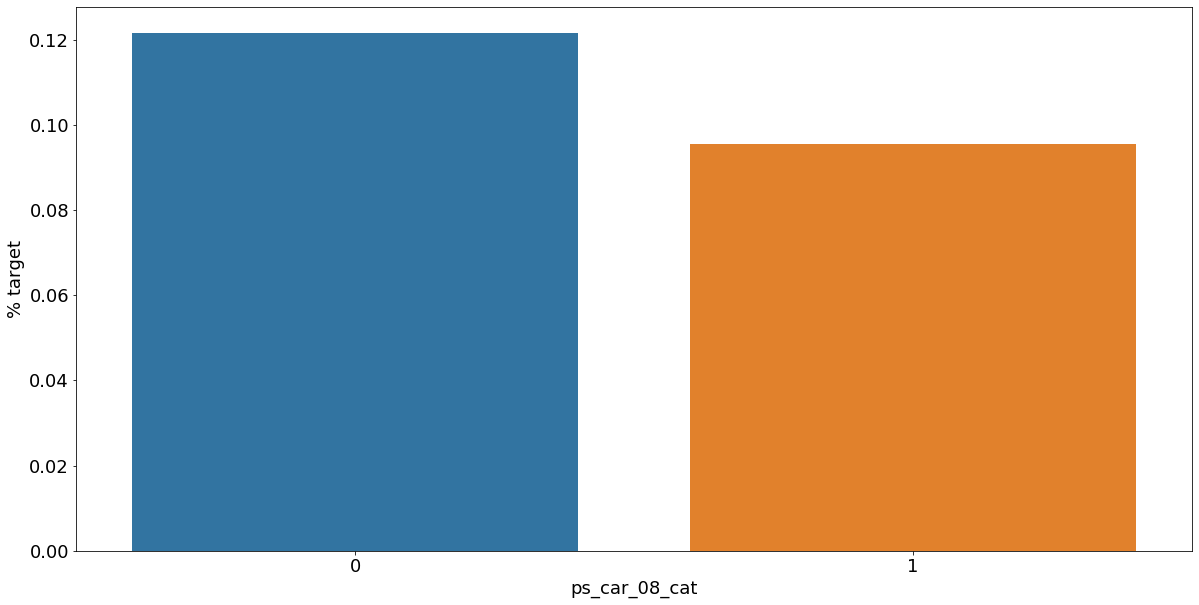

<Figure size 432x288 with 0 Axes>

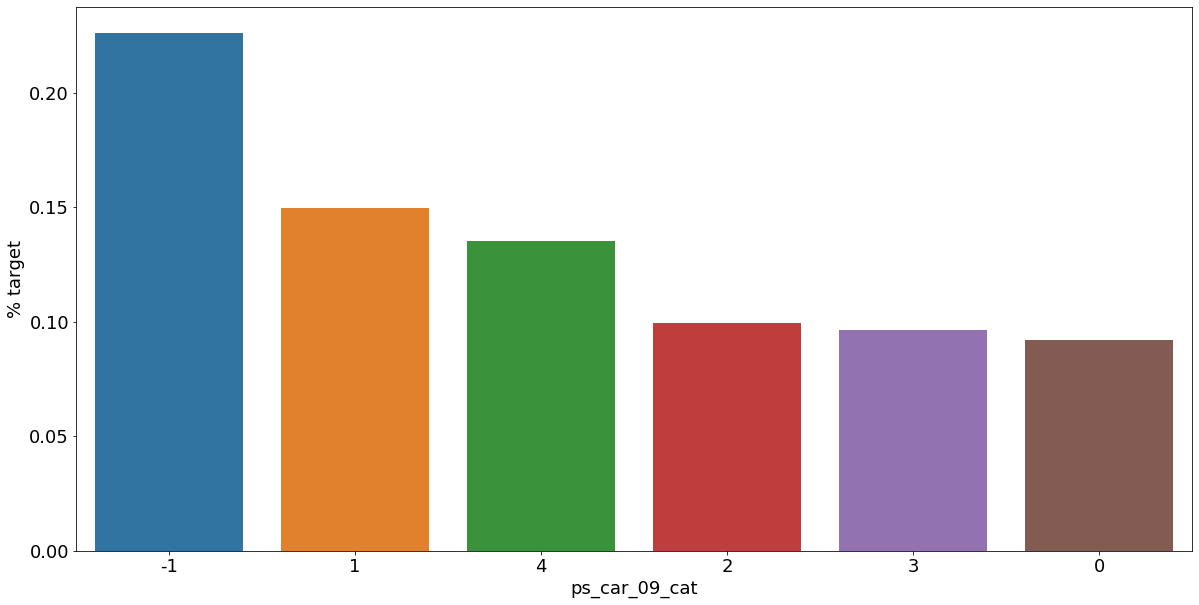

<Figure size 432x288 with 0 Axes>

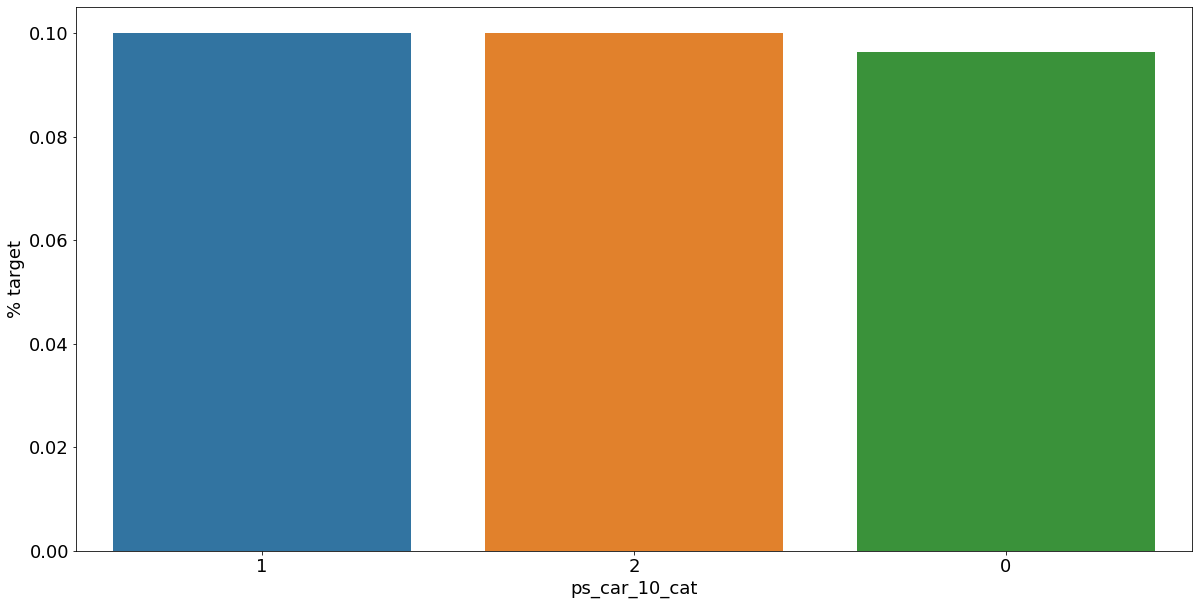

In [31]:
# 타겟 변수가 1 인 고객의 범주형 변수와 비율을 그래프로 그리기

v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    
    # 범주형 값 당 target = 1인 (평균)퍼센트를 계산
    cat_perc = train[[f, 'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    
    # Bar 플롯
    # 타겟 평균으로 내림차순
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();

In [32]:
# m_check
train['ps_ind_02_cat'].value_counts()

 1    157124
 2     45273
 3     10310
 4      4130
-1       103
Name: ps_ind_02_cat, dtype: int64

In [33]:
# m_check
train[['ps_ind_02_cat', 'target']].groupby(['ps_ind_02_cat'],as_index=False).mean()

,ps_ind_02_cat,target
0,-1,0.388350
1,1,0.098190
2,2,0.104102
3,3,0.101746
4,4,0.112349


In [34]:
# m_check
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:

    cat_perc = train[[f, 'target']].groupby([f],as_index=False).mean()
    print(cat_perc)

   ps_ind_02_cat    target
0             -1  0.388350
1              1  0.098190
2              2  0.104102
3              3  0.101746
4              4  0.112349
   ps_ind_04_cat    target
0             -1  0.647059
1              0  0.095856
2              1  0.105431
   ps_ind_05_cat    target
0             -1  0.214539
1              0  0.093245
2              1  0.129896
3              2  0.199495
4              3  0.116066
5              4  0.140752
6              5  0.134907
7              6  0.156298
    ps_car_01_cat    target
0              -1  0.548387
1               0  0.117781
2               1  0.133056
3               2  0.114144
4               3  0.105396
5               4  0.107016
6               5  0.106827
7               6  0.083513
8               7  0.080156
9               8  0.117552
10              9  0.143879
11             10  0.101119
12             11  0.112632
   ps_car_02_cat    target
0             -1  0.000000
1              0  0.131868
2             

> 누락된 값이 있는 변수에서 알 수 있듯, 모드를 사용하는 것 대신 누락된 값을 별도의 범주 값으로 유지하는 것은 좋은 생각이다.
누락된 값을 나타내는 고객들은 보험금 청구를 요구할 확률이 훨씬 더 높은 것으로 보인다.

## 2) Interval variables*

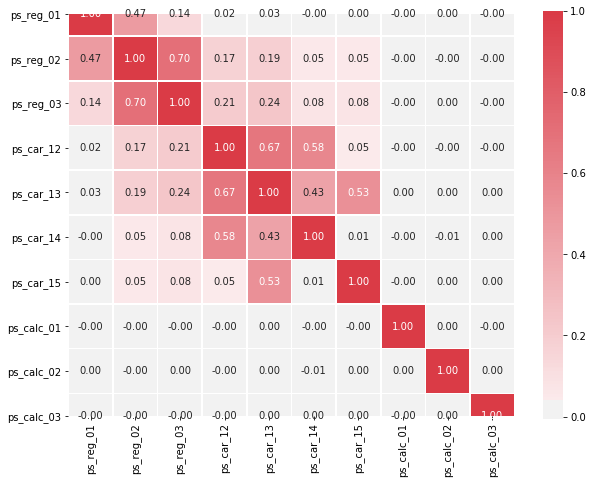

In [35]:
# Interval 변수 사이의 상관관계 확인
def corr_heatmap(v):
    correlations = train[v].corr()
    
    # 두 가지 색상 사이의 색상 맵 만들기
    cmap = sns.diverging_palette(220, 10, as_cmap = True)
    
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center = 0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show();

v = meta[(meta.level == "interval") & (meta.keep)].index
corr_heatmap(v)

> 강한 상관 관계 존재 
- ps_reg_02 and ps_reg_03 (0.70)
- ps_car_12 and ps_car13 (0.67)
- ps_car_12 and ps_car14 (0.58)
- ps_car_13 and ps_car15 (0.67)

ps_reg_02 and ps_reg_03

** lmplot 쓰는 이유
- 선형 관계를 확인 할 수 있다.
- outlier를 제외하고 표시해 준다.
- regplot과 달리 lmplot은 hue 파라미터로 categorial 변수를 지정하여 카테고리별로 데이터의 분포과 선형 관계를 표시할 수 있다.

In [36]:
# 프로세스의 속도룰 높이기 위해 샘플 추출
s = train.sample(frac=0.1)

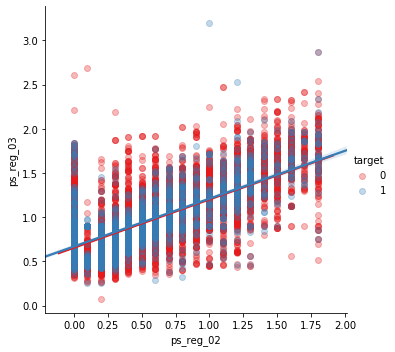

In [37]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

col 옵션으로 두 그래프로 분리할 수 있다.

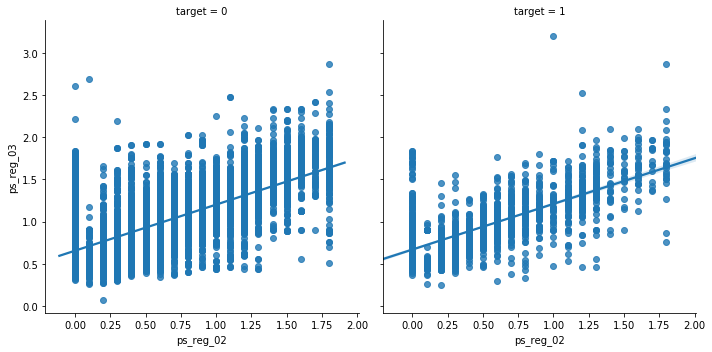

In [38]:
# m
sns.lmplot(x='ps_reg_02', y='ps_reg_03',data=s, col='target' )
plt.show()

> 선형 관계가 있다.

ps_car_12 and ps_car_13

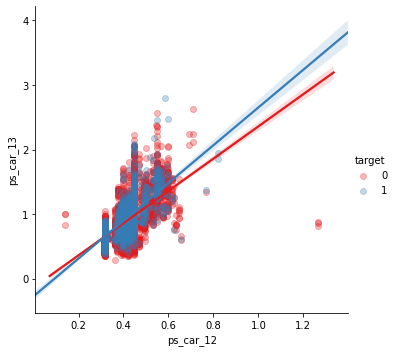

In [39]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

ps_car_12 and ps_car_14

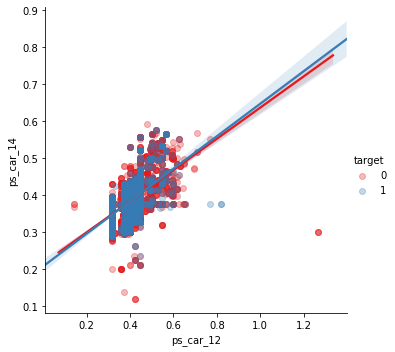

In [40]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

ps_car_13 and ps_car_15

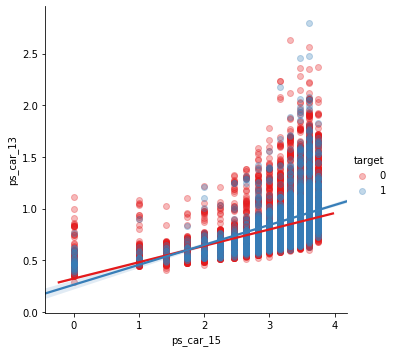

In [41]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

## 3) Ordinal variables

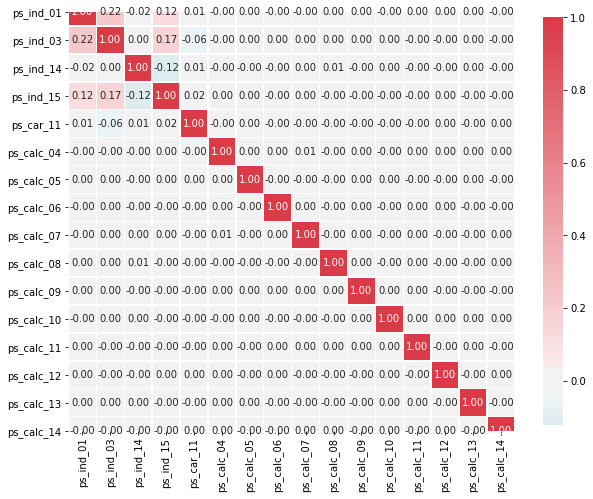

In [42]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

> ordinal 변수에 대해서는 많은 상관 관계를 볼 수 없다.

In [43]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_car_11_cat_te
0,353762,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,11,0,1,0,0.6,0.6,0.838153,11,1,0,6,1,1,2,1,1.0,0.368782,0.540603,0.345688,2.000000,0.9,0.3,0.0,3,0,7,3,8,4,8,1,0,4,6,0,1,1,0,0,1,0.095601
1,845629,0,5,1,7,1,1,1,0,0,0,0,0,0,0,0,5,0,0,1,0.9,0.6,0.728440,7,1,0,14,1,1,2,1,1.0,0.424264,0.382953,0.378814,0.000000,0.2,0.0,0.6,1,1,7,5,10,4,11,3,0,3,7,0,0,0,0,1,0,0.122013
2,1449185,0,4,1,3,1,0,1,0,0,0,0,0,0,0,0,4,1,0,0,0.9,0.6,0.869267,11,1,0,3,1,1,2,1,3.0,0.400000,0.814271,0.402368,3.316625,0.3,0.9,0.1,4,1,8,5,10,2,8,7,2,3,10,0,1,0,1,0,1,0.095508
3,834066,0,6,1,6,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.6,1.5,1.705872,6,1,0,1,1,1,0,1,2.0,0.400000,0.838387,0.378418,3.605551,0.8,0.4,0.1,3,3,7,2,11,3,10,2,2,0,14,0,0,0,0,0,0,0.086422
4,436189,0,5,1,5,0,0,0,0,1,0,0,0,0,0,0,10,1,0,0,0.8,0.8,1.086566,5,1,0,0,0,1,0,1,3.0,0.400000,0.905777,0.384838,3.605551,0.6,0.5,0.9,3,3,5,2,9,1,6,5,1,6,8,0,1,1,1,0,1,0.108855


# 7. 피처 엔지니어링

## 1) 더미 변수 만들기

범주형 변수의 값은 순서 또는 크기를 나타내지 않음 => 카테고리 값을 다루기 위해 더미 변수를 만들 수 있다.
(첫 번째 더미 변수는 원래 변수의 범주에 대해 생성 된 다른 더미 변수에서 파생 될 수 있기 때문에 버립니다.)

In [44]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))
train = pd.get_dummies(train, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

Before dummification we have 57 variables in train
After dummification we have 109 variables in train


## 2) interaction 변수 만들기*

In [45]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
print(v)

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))
interactions.drop(v, axis=1, inplace=True)  # 원래의 컬럼 제거

# train 데이터에 상호 작용 변수 연결
print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
train = pd.concat([train, interactions], axis=1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object', name='varname')
Before creating interactions we have 109 variables in train
After creating interactions we have 164 variables in train


In [46]:
train.head()

,id,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_car_11_cat_te,ps_ind_02_cat_1,ps_ind_02_cat_2,ps_ind_02_cat_3,ps_ind_02_cat_4,...,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_01,ps_reg_01 ps_calc_02,ps_reg_01 ps_calc_03,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,ps_reg_02 ps_calc_03,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_reg_03 ps_calc_01,ps_reg_03 ps_calc_02,ps_reg_03 ps_calc_03,ps_car_12^2,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,ps_car_12 ps_calc_01,ps_car_12 ps_calc_02,ps_car_12 ps_calc_03,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_13 ps_calc_01,ps_car_13 ps_calc_02,ps_car_13 ps_calc_03,ps_car_14^2,ps_car_14 ps_car_15,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_15^2,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01^2,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02^2,ps_calc_02 ps_calc_03,ps_calc_03^2
0,353762,0,1,1,1,0,0,0,0,0,0,0,0,11,0,1,0,0.6,0.6,0.838153,1.0,0.368782,0.540603,0.345688,2.000000,0.9,0.3,0.0,3,0,7,3,8,4,8,1,0,4,6,0,1,1,0,0,1,0.095601,1,0,0,0,...,0.207413,1.200000,0.54,0.18,0.00,0.36,0.502892,0.221269,0.324362,0.207413,1.200000,0.54,0.18,0.00,0.702500,0.309095,0.453108,0.289739,1.676305,0.754337,0.251446,0.000000,0.136,0.199365,0.127483,0.737564,0.331904,0.110635,0.000000,0.292252,0.186880,1.081207,0.486543,0.162181,0.000000,0.1195,0.691375,0.311119,0.103706,0.000000,4.0,1.800000,0.600000,0.000000,0.81,0.27,0.00,0.09,0.00,0.00
1,845629,0,5,7,1,0,0,0,0,0,0,0,0,5,0,0,1,0.9,0.6,0.728440,1.0,0.424264,0.382953,0.378814,0.000000,0.2,0.0,0.6,1,1,7,5,10,4,11,3,0,3,7,0,0,0,0,1,0,0.122013,1,0,0,0,...,0.340933,0.000000,0.18,0.00,0.54,0.36,0.437064,0.254558,0.229772,0.227288,0.000000,0.12,0.00,0.36,0.530625,0.309051,0.278958,0.275943,0.000000,0.145688,0.000000,0.437064,0.180,0.162473,0.160717,0.000000,0.084853,0.000000,0.254558,0.146653,0.145068,0.000000,0.076591,0.000000,0.229772,0.1435,0.000000,0.075763,0.000000,0.227288,0.0,0.000000,0.000000,0.000000,0.04,0.00,0.12,0.00,0.00,0.36
2,1449185,0,4,3,1,0,0,0,0,0,0,0,0,4,1,0,0,0.9,0.6,0.869267,3.0,0.400000,0.814271,0.402368,3.316625,0.3,0.9,0.1,4,1,8,5,10,2,8,7,2,3,10,0,1,0,1,0,1,0.095508,1,0,0,0,...,0.362131,2.984962,0.27,0.81,0.09,0.36,0.521560,0.240000,0.488563,0.241421,1.989975,0.18,0.54,0.06,0.755625,0.347707,0.707819,0.349765,2.883032,0.260780,0.782340,0.086927,0.160,0.325708,0.160947,1.326650,0.120000,0.360000,0.040000,0.663037,0.327637,2.700631,0.244281,0.732844,0.081427,0.1619,1.334504,0.120710,0.362131,0.040237,11.0,0.994987,2.984962,0.331662,0.09,0.27,0.03,0.81,0.09,0.01
3,834066,0,6,6,1,0,0,0,0,0,0,0,0,8,1,0,0,0.6,1.5,1.705872,2.0,0.400000,0.838387,0.378418,3.605551,0.8,0.4,0.1,3,3,7,2,11,3,10,2,2,0,14,0,0,0,0,0,0,0.086422,1,0,0,0,...,0.227051,2.163331,0.48,0.24,0.06,2.25,2.558808,0.600000,1.257580,0.567627,5.408327,1.20,0.60,0.15,2.910000,0.682349,1.430181,0.645532,6.150610,1.364698,0.682349,0.170587,0.160,0.335355,0.151367,1.442221,0.320000,0.160000,0.040000,0.702893,0.317260,3.022847,0.670710,0.335355,0.083839,0.1432,1.364405,0.302734,0.151367,0.037842,13.0,2.884441,1.442221,0.360555,0.64,0.32,0.08,0.16,0.04,0.01
4,436189,0,5,5,0,0,1,0,0,0,0,0,0,10,1,0,0,0.8,0.8,1.086566,3.0,0.400000,0.905777,0.384838,3.605551,0.6,0.5,0.9,3,3,5,2,9,1,6,5,1,6,8,0,1,1,1,0,1,0.108855,1,0,0,0,...,0.307870,2.884441,0.48,0.40,0.72,0.64,0

> get_feature_names 메소드 => 새로운 변수에 열 이름을 할당 할 수 있다.

# 8. 피처 선택

원래 예측모형에서 중요한 특징데이터란 종속데이터와의 상관관계가 크고 예측에 도움이 되는 데이터를 말한다. 하지만 상관관계 계산에 앞서 특징데이터의 값 자체가 표본에 따라 그다지 변하지 않는다면 종속데이터 예측에도 도움이 되지 않을 가능성이 높다. 따라서 표본 변화에 따른 데이터 값의 변화 즉, 분산이 기준치보다 낮은 특징 데이터는 사용하지 않는 방법이 분산에 의한 선택 방법이다.

## 1) 분산이 낮거나 0인 피처 제거*
- VarianceThreshold : 분산이 0인 피처를 제거해 준다.

이 데이터에는 분산이 0인 피처 없음, 1% 미만의 분산을 가진 피처를 제거하자

In [47]:
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(['id', 'target'], axis=1)) # id와 target 변수 없이 훈련하는 것이 적합

f = np.vectorize(lambda x : not x) # 부울 배열 요소를 토글(하나의 설정 값으로부터 다른 값으로 전환)하는 함수
v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]

print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

28 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


## 2) Select features From Model

##### Random Forest

Random Forest의 중요한 피처들을 기반으로 피처 선택
- Sklearn의 SelectFromModel을 사용
  - 피처 중요도 수준에서 임계 값을 수동으로 설정할 수 있다.
  - 하지만 우리는 간단히 상위 50 % 상위 변수만 선택할 것이다.

- 1. 특성의 중요도를 평가
- 2. 가장 중요한 특성들만 선택함

In [ ]:
X_train = train.drop(['id','target'], axis=1)
y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))

get_support 메소드를 사용하면 train 데이터의 변수 수를 제한 할 수 있다.

In [ ]:
sfm = SelectFromModel(rf, threshold = 'median', prefit = True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

In [ ]:
train = train[selected_vars + ['target']]

# 9. 피처 스케일링

스케일링
- StandardScaler(X): 평균이 0과 표준편차가 1이 되도록 변환.
- RobustScaler(X): 중앙값(median)이 0, IQR(interquartile range)이 1이 되도록 변환.
- MinMaxScaler(X): 최대값이 각각 1, 최소값이 0이 되도록 변환
- MaxAbsScaler(X): 0을 기준으로 절대값이 가장 큰 수가 1또는 -1이 되도록 변환

Standard 스케일링을 train 데이터에 적용

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'], axis = 1))